# LSTM Stock Predictor Using Closing Prices

In this notebook, you will build and train a custom LSTM RNN that uses a 10 day window of Bitcoin closing prices to predict the 11th day closing price. 

You will need to:

1. Prepare the data for training and testing
2. Build and train a custom LSTM RNN
3. Evaluate the performance of the model

## Data Preparation

In this section, you will need to prepare the training and testing data for the model. The model will use a rolling 10 day window to predict the 11th day closing price.

You will need to:
1. Use the `window_data` function to generate the X and y values for the model.
2. Split the data into 70% training and 30% testing
3. Apply the MinMaxScaler to the X and y values
4. Reshape the X_train and X_test data for the model. Note: The required input format for the LSTM is:

```python
reshape((X_train.shape[0], X_train.shape[1], 1))
```

In [ ]:
# ### Build and train custom LSTM RNNs

# In each Jupyter Notebook, create the same custom LSTM RNN architecture. In one notebook, you will fit the data using the FNG values. In the second notebook, you will fit the data using only closing prices.

# Use the same parameters and training steps for each model. This is necessary to compare each model accurately.

# ### Evaluate the performance of each model

# Finally, use the testing data to evaluate each model and compare the performance.

# Use the above to answer the following:

# > Which model has a lower loss?
# >
# > Which model tracks the actual values better over time?
# >
# > Which window size works best for the model?

In [35]:

import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
import os
import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
#from sklearn.exceptions import DataConversionWarning
#warnings.filterwarnings(action="ignore", category=DataConversionWarning)

In [36]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [37]:
# Load the fear and greed sentiment data for Bitcoin
df = pd.read_csv('btc_sentiment.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df = df.drop(columns="fng_classification")
df.head()

,fng_value
date,
2019-07-29,19
2019-07-28,16
2019-07-27,47
2019-07-26,24
2019-07-25,42


In [38]:
# Load the historical closing prices for Bitcoin
df2 = pd.read_csv('btc_historic.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)['Close']
df2 = df2.sort_index()
df2.tail()

Date
2019-07-25    9882.429688
2019-07-26    9847.450195
2019-07-27    9478.320313
2019-07-28    9531.769531
2019-07-29    9529.889648
Name: Close, dtype: float64

In [39]:
# Join the data into a single DataFrame
df = df.join(df2, how="inner")
df.tail()

,fng_value,Close
2019-07-25,42,9882.429688
2019-07-26,24,9847.450195
2019-07-27,47,9478.320313
2019-07-28,16,9531.769531
2019-07-29,19,9529.889648


In [40]:
df.head()

,fng_value,Close
2018-02-01,30,9114.719727
2018-02-02,15,8870.820313
2018-02-03,40,9251.269531
2018-02-04,24,8218.049805
2018-02-05,11,6937.080078


In [41]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [42]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)


In [43]:
# Use 70% of the data for training and the remaineder for testing
# YOUR CODE HERE!

split = int(0.7 * len(X))

X_train = X[: int(split*1.0)]
#X_val = X[int(split*0.9) :split]
X_test = X[split:]

y_train = y[: int(split*1.0)]
#y_val = y[int(split*0.9) :split]
y_test = y[split:]


In [44]:
X_train.shape

(372, 10)

In [45]:
#X_val.shape

In [46]:
X_test.shape

(160, 10)

In [47]:
y_train.shape

(372, 1)

In [48]:
#y_val.shape

In [49]:
y_test.shape

(160, 1)

In [50]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# YOUR CODE HERE!

# Create a MinMaxScaler object
scaler_1 = MinMaxScaler()

# Fit the MinMaxScaler object with the training feature data X_train
scaler_1.fit(X_train)

# Scale the features training and testing sets
X_train = scaler_1.transform(X_train)
#X_val = scaler_1.transform(X_val)
X_test = scaler_1.transform(X_test)

# Create another MinMaxScaler object
#scaler_2 = MinMaxScaler()

# Fit the MinMaxScaler object with the training target data y_train
scaler_1.fit(y_train)

# Scale the target training and testing sets
y_train = scaler_1.transform(y_train)
#y_val = scaler_2.transform(y_val)
y_test = scaler_1.transform(y_test)



In [51]:
# Reshape the features for the model
# YOUR CODE HERE!

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")


X_train sample values:
[[[0.7111066 ]
  [0.68162134]
  [0.72761425]
  [0.60270722]
  [0.44784942]
  [0.54023074]
  [0.52711046]
  [0.60786209]
  [0.66058747]
  [0.64516902]]

 [[0.68162134]
  [0.72761425]
  [0.60270722]
  [0.44784942]
  [0.54023074]
  [0.52711046]
  [0.60786209]
  [0.66058747]
  [0.64516902]
  [0.58657552]]

 [[0.72761425]
  [0.60270722]
  [0.44784942]
  [0.54023074]
  [0.52711046]
  [0.60786209]
  [0.66058747]
  [0.64516902]
  [0.58657552]
  [0.68651129]]

 [[0.60270722]
  [0.44784942]
  [0.54023074]
  [0.52711046]
  [0.60786209]
  [0.66058747]
  [0.64516902]
  [0.58657552]
  [0.68651129]
  [0.64219515]]

 [[0.44784942]
  [0.54023074]
  [0.52711046]
  [0.60786209]
  [0.66058747]
  [0.64516902]
  [0.58657552]
  [0.68651129]
  [0.64219515]
  [0.7559475 ]]] 

X_test sample values:
[[[0.05471891]
  [0.04579717]
  [0.04653096]
  [0.0451359 ]
  [0.0430626 ]
  [0.04363925]
  [0.04651042]
  [0.05299984]
  [0.05299984]
  [0.08221318]]

 [[0.04579717]
  [0.04653096]
  [0.045135

---

## Build and Train the LSTM RNN

In this section, you will design a custom LSTM RNN and fit (train) it using the training data.

You will need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

### Hints:
You will want to use the same model architecture and random seed for both notebooks. This is necessary to accurately compare the performance of the FNG model vs the closing price model. 

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# # Build the LSTM model. 
# # The return sequences need to be set to True if you are adding additional LSTM layers, but 
# # You don't have to do this for the final layer. 
# # Note: The dropouts help prevent overfitting
# # Note: The input shape is the number of time steps and the number of indicators
# # Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# # YOUR CODE HERE!

# # Model set-up
# number_input_features = 1
# hidden_nodes_layer1 = 15
# hidden_nodes_layer2 = 5

# # Define the LSTM RNN model
# model = Sequential()

# # Layer 1
# model.add(
#     Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
# )

# # Layer 2
# model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# # Output layer
# model.add(Dense(1, activation="sigmoid"))



In [54]:
# Define the LSTM RNN model.
model = Sequential()

number_units_1 = 30
number_units_2 = 20
number_units_3 = 10
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units_1,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units_2, return_sequences=True))
model.add(Dropout(dropout_fraction))

# # Layer 3
model.add(LSTM(units=number_units_3))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [ ]:
# Compile the model
# YOUR CODE HERE!

# Compile the model
# model.compile(
#     loss="binary_crossentropy",
#     optimizer="adam",
#     metrics=[
#         "accuracy",
#         tf.keras.metrics.TruePositives(name="tp"),
#         tf.keras.metrics.TrueNegatives(name="tn"),
#         tf.keras.metrics.FalsePositives(name="fp"),
#         tf.keras.metrics.FalseNegatives(name="fn"),
#         tf.keras.metrics.Precision(name="precision"),
#         tf.keras.metrics.Recall(name="recall"),
#         tf.keras.metrics.AUC(name="auc"),
#     ],
# )



In [55]:
# Compile the model
# YOUR CODE HERE!

model.compile(optimizer="adam", loss="mean_squared_error")



In [56]:
# Summarize the model
# YOUR CODE HERE!

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 30)            3840      
                                                                 
 dropout_4 (Dropout)         (None, 10, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 20)            4080      
                                                                 
 dropout_5 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_6 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
# YOUR CODE HERE!


# Training the model
# batch_size = 1000
# epochs = 50
# training_history = model.fit(
#     X_train,
#     y_train,
#     validation_data=(X_val, y_val),
#     epochs=epochs,
#     batch_size=batch_size,
#     verbose=1,
# )




In [57]:

# Train the mode

model.fit(X_train, y_train, validation_split=0.2, epochs=10, shuffle=False, batch_size=1, verbose=1)


Epoch 1/10
297/297 [==============================] - 21s 40ms/step - loss: 0.0389 - val_loss: 0.0062
Epoch 2/10
297/297 [==============================] - 11s 37ms/step - loss: 0.0331 - val_loss: 0.0091
Epoch 3/10
297/297 [==============================] - 10s 33ms/step - loss: 0.0353 - val_loss: 0.0229
Epoch 4/10
297/297 [==============================] - 8s 27ms/step - loss: 0.0291 - val_loss: 0.0121
Epoch 5/10
297/297 [==============================] - 7s 24ms/step - loss: 0.0305 - val_loss: 0.0022
Epoch 6/10
297/297 [==============================] - 7s 22ms/step - loss: 0.0264 - val_loss: 6.8583e-04
Epoch 7/10
297/297 [==============================] - 8s 25ms/step - loss: 0.0267 - val_loss: 0.0023
Epoch 8/10
297/297 [==============================] - 8s 27ms/step - loss: 0.0218 - val_loss: 0.0016
Epoch 9/10
297/297 [==============================] - 7s 25ms/step - loss: 0.0195 - val_loss: 0.0015
Epoch 10/10
297/297 [==============================] - 6s 21ms/step - loss: 0.0214 -

---

## Model Performance

In this section, you will evaluate the model using the test data. 

You will need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [58]:
# Evaluate the model
# YOUR CODE HERE!

model.evaluate(X_test, y_test)


5/5 [==============================] - 2s 7ms/step - loss: 0.0774


0.07737444341182709

In [59]:
# Make some predictions
# YOUR CODE HERE!

predicted = model.predict(X_test)


In [61]:
# Recover the original prices instead of the scaled version - INVERSE TRANSFORM

predicted_prices = scaler_1.inverse_transform(predicted)
real_prices = scaler_1.inverse_transform(y_test.reshape(-1, 1))


In [62]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
2019-02-20,3924.239990,3044.221436
2019-02-21,3974.050049,3054.517578
2019-02-22,3937.040039,3081.120850
2019-02-23,3983.530029,3114.427490
2019-02-24,4149.089844,3154.111816


<AxesSubplot:>

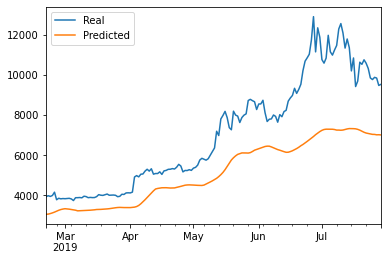

In [63]:
# Plot the real vs predicted values as a line chart
# YOUR CODE HERE!

stocks.plot()
